# Programmation dynamique et plus court chemin (correction)

Correction.

On récupère le fichier ``matrix_distance_7398.txt`` depuis [matrix_distance_7398.zip](https://github.com/sdpython/teachpyx/raw/main/_data/matrix_distance_7398.zip) qui contient des distances entre différentes villes (pas toutes).

In [1]:
from teachpyx.tools.data_helper import download_and_unzip

url = "https://github.com/sdpython/teachpyx/raw/main/_data/matrix_distance_7398.zip"

download_and_unzip(url)

['./matrix_distance_7398.txt']

In [2]:
import pandas

df = pandas.read_csv(
    "matrix_distance_7398.txt", sep="\t", header=None, names=["v1", "v2", "distance"]
)
matrice = df.values
matrice[:5]

array([['Boulogne-Billancourt', 'Beauvais', 85597],
       ['Courbevoie', 'Sevran', 26564],
       ['Colombes', 'Alfortville', 36843],
       ['Bagneux', 'Marcq-En-Baroeul', 233455],
       ['Suresnes', 'Gennevilliers', 10443]], dtype=object)

## Exercice 1

In [3]:
vil = {}
for row in matrice:
    vil[row[0]] = 0
    vil[row[1]] = 1
vil = list(vil.keys())
print(len(vil))

196


## Exercice 2

La distance n'existe pas encore. L'exception du court programme suivant le montre. Rejoindre Bordeaux depuis Charleville nécessite plusieurs étapes.

In [4]:
dist = {}
for row in matrice:
    a = row[0]
    b = row[1]
    dist[a, b] = dist[b, a] = row[2]
print(len(dist))

7888


In [7]:
try:
    print(dist["Charleville-Mezieres", "Bordeaux"])  # elle n'existe pas encore
except Exception as e:
    print(type(e), e)

<class 'KeyError'> ('Charleville-Mezieres', 'Bordeaux')


## Exercice 3

On peut remplir facilement toutes les cases correspondant aux villes reliées à Charleville-Mézières, c'est-à-dire toutes les villes accessibles en une étape.

In [8]:
d = {}
d["Charleville-Mezieres"] = 0
for v in vil:
    d[v] = 1e10
for v, w in dist:
    if v == "Charleville-Mezieres":
        d[w] = dist[v, w]
print(len(d))

196


## Exercice 4

Si on découvre que $d[w] > d[v] + dist[w,v]$, cela veut dire qu'il faut mettre à jour le tableau $d$ car il ne contient pas la distance optimale. On répète cela pour toutes les paires $(v,w)$.

In [9]:
for v, w in dist:
    d2 = d[v] + dist[v, w]
    if d2 < d[w]:
        d[w] = d2
print(d["Bordeaux"])

816197


On trouve 813197 mètres pour la distance (Charleville-Mezieres, Bordeaux). Ce n'est pas forcément la meilleure. Pour être sûr, il faut répéter la même itération autant de fois qu'il y a de villes (car le plus long chemin contient autant d'étapes qu'il y a de villes). 

In [10]:
for i in range(0, len(d)):
    for v, w in dist:
        d2 = d[v] + dist[v, w]
        if d2 < d[w]:
            d[w] = d2
print(d["Bordeaux"])

795670


## Exercice facultatif

Pour montrer que l'algorithme suggéré permettra d'obtenir la solution optimale, il faut montrer qu'il n'est pas nécessaire d'envisager aucun autre ordre que celui des skieurs et des paires triés par taille croissante. Cela ne veut pas dire qu'un autre ordre ne sera pas optimal, cela veut dire que pour obtenir l'appariement de coût optimal, il existe une solution pour laquelle skieurs et skis sont rangés dans l'ordre.

On considère donc un appariement $\sigma$ qui associé le skieur $t_i$ à la paire $s_{\sigma(i)}$. Il suffit que montrer que :

$\forall i,j,  \; t_i \leqslant t_j \Longleftrightarrow s_{\sigma(i)} \leqslant s_{\sigma(j)}$

Pour montrer cela, on fait un raisonnement par l'absurde : pour $i$ et $j$ quelconques, on suppose qu'il existe un appariement optimal tel que  $t_i \geqslant  t_j$ et $s_{\sigma(i)} < s_{\sigma(j)}$. Le coût $C(\sigma)$ de cet appariement est :

$C(\sigma) = \sum_{k=1}^{N} \left| t_k - s_{\sigma(k)} \right| = \alpha + \left| t_i - s_{\sigma(i)} \right| + \left| t_j - s_{\sigma(j)} \right|$

Le coût de l'appariement en permutant les skieurs $i$ et $j$ (donc en les rangeant dans l'ordre croissant) est :

$C(\sigma') = \sum_{k=1}^{N} \left| t_k - s_{\sigma(k)} \right| = \alpha + \left| t_j - s_{\sigma(i)} \right| + \left| t_i - s_{\sigma(j)} \right|$

On calcule :

$C(\sigma) - C(\sigma') = \left| t_i - s_{\sigma(i)} \right| + \left| t_j - s_{\sigma(j)} \right|  - \left| t_j - s_{\sigma(i)} \right| - \left| t_i - s_{\sigma(j)} \right|$

Premier cas $t_j \geqslant s_{\sigma(i)}$ et $t_i > t_j \geqslant s_{\sigma(i)}$ et :

$\begin{array}{rcl} C(\sigma) - C(\sigma') &=& \left| t_i - s_{\sigma(i)} \right| + \left| t_j - s_{\sigma(j)} \right|  - \left(  t_j - s_{\sigma(j)} + s_{\sigma(j)} - s_{\sigma(i)} \right) - \left| t_i - s_{\sigma(j)} \right| \\ &=&  t_i - s_{\sigma(i)}  + \left| t_j - s_{\sigma(j)} \right|  - \left(  t_j - s_{\sigma(j)} \right) - \left( s_{\sigma(j)} - s_{\sigma(i)} \right) - \left| t_i - s_{\sigma(j)} \right| \\ &=&  t_i - s_{\sigma(i)}- \left| t_i - s_{\sigma(i)} \right|  + \left| t_j - s_{\sigma(j)} \right|  - \left(  t_j - s_{\sigma(j)} \right) \\ &=&  \left| t_j - s_{\sigma(j)} \right|  - \left(  t_j - s_{\sigma(j)} \right|) \\  &\geqslant& 0 \end{array}$

Second cas $t_j \leqslant s_{\sigma(i)}$ et $t_j \leqslant s_{\sigma(i)} \leqslant s_{\sigma(j)}$ et :

$\begin{array}{rcl} C(\sigma) - C(\sigma') &=& \left| t_i - s_{\sigma(i)} \right| + s_{\sigma(j)} -t_j  - \left(  s_{\sigma(i)} - t_j\right) - \left| t_i - s_{\sigma(j)} \right| \\ &=& \left| t_i - s_{\sigma(i)} \right| + s_{\sigma(j)} -  s_{\sigma(i)} - \left| t_i - s_{\sigma(j)} \right| \\ &\geqslant& \left| t_i - s_{\sigma(j)}\right| - \left|  s_{\sigma(j)} -  s_{\sigma(i)} \right| + s_{\sigma(j)} -  s_{\sigma(i)} - \left| t_i - s_{\sigma(j)} \right| \\ &\geqslant& 0 \end{array}$

Dans les deux cas, on montre donc qu'il existe un appariement meilleur ou équivalent en permutant les deux skieurs $i$ et $j$, c'est-à-dire en les triant par ordre croissant de taille. Nous avons donc montré que, si les paires de ski sont triées par ordre croissant de taille, il existe necéssairement un appariement optimal pour lequel les skieurs sont aussi triés par ordre croissant. Lors de la recherche de cet appariement optimal, on peut se restreindre à ces cas de figure.

## Exercice 5

$p(n,m) = \min \left\{  p(n-1,m-1) + \left| t_n - s_m \right|, p(n,m-1) \right\}$

Lorsqu'on considère le meilleur appariement des paires $1..m$ et des skieurs $1..n$, il n'y a que deux choix possibles pour la paire $m$ :

- soit elle n'est associée à aucun skieur et dans ce cas : $p(n,m) = p(n,m-1)$,
- soit elle est associée au skieur $n$ (et à aucun autre) : $p(n,m) = p(n-1,m-1) + \left| t_n - s_m \right|$.

## Exercice 6

In [11]:
import random

skieurs = [random.gauss(1.75, 0.1) for i in range(0, 10)]
paires = [random.gauss(1.75, 0.1) for i in range(0, 15)]
skieurs.sort()
paires.sort()

p = {}
p[-1, -1] = 0
for n, taille in enumerate(skieurs):
    p[n, -1] = p[n - 1, -1] + taille
for m, paire in enumerate(paires):
    p[-1, m] = 0
for n, taille in enumerate(skieurs):
    for m, paire in enumerate(paires):
        p1 = p.get((n, m - 1), 1e10)
        p2 = p.get((n - 1, m - 1), 1e10) + abs(taille - paire)
        p[n, m] = min(p1, p2)

print(p[len(skieurs) - 1, len(paires) - 1])

0.301415513544109


## Exercice 7

Il faut imaginer que $p$ peut être représenté sous forme de matrice et qu'à chaque fois, on prend le meilleur chemin parmi 2 :

- Chemin horizontal : on ne choisit pas la paire $m$.
- Chemin diagonal : on choisit la paire $m$ pour le skieur $n$

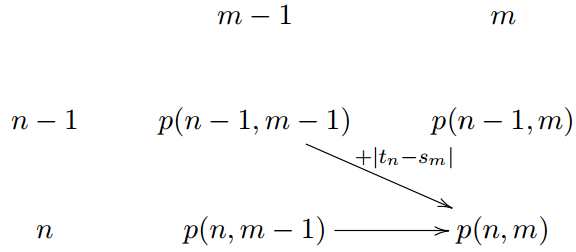

In [13]:
from IPython.display import Image

Image("graph_notebook_ski.png")

`` \xymatrix{  & m-1  & m \\      n-1   &  p(n-1,m-1) \ar[dr]^{ + \abs{t_n - s_m}} &  p(n-1,m) \\      n     &  p(n,m-1)   \ar[r] & p(n,m) \\ } ``

In [14]:
p = {}
p[-1, -1] = 0
best = {}
for n, taille in enumerate(skieurs):
    p[n, -1] = p[n - 1, -1] + taille
for m, paire in enumerate(paires):
    p[-1, m] = 0
for n, taille in enumerate(skieurs):
    for m, paire in enumerate(paires):
        p1 = p.get((n, m - 1), 1e10)
        p2 = p.get((n - 1, m - 1), 1e10) + abs(taille - paire)
        p[n, m] = min(p1, p2)

        if p[n, m] == p1:
            best[n, m] = n, m - 1
        else:
            best[n, m] = n - 1, m - 1

print(p[len(skieurs) - 1, len(paires) - 1])

chemin = []
pos = len(skieurs) - 1, len(paires) - 1
while pos in best:
    print(pos)
    chemin.append(pos)
    pos = best[pos]
chemin.reverse()
print(chemin)

0.301415513544109
(9, 14)
(9, 13)
(9, 12)
(9, 11)
(8, 10)
(7, 9)
(6, 8)
(6, 7)
(6, 6)
(5, 5)
(4, 4)
(3, 3)
(2, 2)
(1, 1)
(0, 0)
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (6, 7), (6, 8), (7, 9), (8, 10), (9, 11), (9, 12), (9, 13), (9, 14)]


## Exercice 8

Les deux algorithmes ont un coût quadratique.

## Prolongements : degré de séparation sur Facebook

In [15]:
import pandas

url = "https://github.com/sdpython/teachpyx/raw/de/_data/facebook.zip"

download_and_unzip(url)
df = pandas.read_csv("facebook/1912.edges", sep=" ", names=["v1", "v2"])
df.head()

,v1,v2
0,2290,2363
1,2346,2025
2,2140,2428
3,2201,2506
4,2425,2557
